<a href="https://colab.research.google.com/github/JuanJGalindo/ML-Theory/blob/main/Tarea4/Estimators_CrossValidationError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea y Contexto**

- Demostrar a través de Simulación Monte Carlo, la calidad de dos estimadores estadísticos.
- Generar un señal sinusoidal con ruido gaussiano, hacer ajuste polinomial y estimar la calidad del ajuste con MSE y CrossValidation Error

## **Tarea 1**

Queremos estimar una señal constante de amplitud $A=5$ observada con **Ruido Gaussiano**. Cada observación está dada por:

$$x_i = A + w_i, \qquad w_i \sim \mathcal{N}(0,1)$$


Comparamos dos **estimadores** de $A$:
- **Estimador 1 ($\hat{A}_1$):** La media muestral de todas las $N$ observaciones.
- **Estimador 2 ($\hat{A}_2$):** El valor de la primer muestra.


Se implementa una **Simulación Monte Carlo ($M=10{,}000$ trials y $N=1{,}000$ muestras)** para estudiar la calidad de estos estimadores a través de su **varianza**.

En teoría, se deberían esperar los siguientes comportamientos para cada estimador:

- **Estimador 1 ($\hat{A}_1$):**

$$\hat A_1 = \frac{1}{N}\sum_{i=1}^N x_i
= A + \frac{1}{N}\sum_{i=1}^N w_i$$

$$\mathbb{E}[\hat A_1] = A + \frac{1}{N}\sum_{i=1}^N \mathbb{E}[w_i]
= A + \frac{1}{N}\dot{}0
= A$$

$$\operatorname{Var}[\hat A_1] = \operatorname{Var}\\Big[\frac{1}{N}\sum_{i=1}^N w_i\Big]
=\frac{1}{N^2}\sum_{i=1}^N \operatorname{Var}[w_i]
=\frac{1}{N^2}\sum_{i=1}^N 1
=\frac{1}{N}.
\$$

$$\
\boxed{\\hat A_1 \sim \mathcal{N}\\left(A,\frac{1}{N}\right)\}
\$$


- **Estimador 2 ($\hat{A}_2$):**

$$\
\hat A_2 = x_1
= A + w_1
\$$

$$\
\mathbb{E}[\hat A_2] = A + \mathbb{E}[w_1]
= A + 0
= A$$

$$\qquad
\operatorname{Var}[\hat A_2] = \operatorname{Var}[w_1] = 1
\$$

$$\
\boxed{\\hat A_2 \sim \mathcal{N}\\left(A,1\right)\}
\$$


In [75]:
# Library Import
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
M = 10000     # Monte Carlo Simulation Number
N = 1000      # Sample Size
A = 5         # Mean Expectated Amplitude

# Estimators History
A1 = np.zeros((M,1))
A2 = np.zeros((M,1))

# Simulation Loop
for m in range(M):
  # Simulation Progress Information
  if (m % 500 == 0 and m >= M/2) or (m == M-1):
    print(f'Monte Carlo Simulation {m}/{M}')
    print(f"Var[A1] = {np.var(A1)}, Var[A2] = {np.var(A2)}\n")

  w = np.random.randn(N) # New Noise Observation Set
  x = A + w              # Observation Sample Set

  A1[m] = np.mean(x) # Est1: Gaussian Likelihood Mean - i.i.d Data
  A2[m] = x[0]       # Est2: First Sample Element Value


Monte Carlo Simulation 5000/10000
Var[A1] = 6.2517394493033365, Var[A2] = 6.722413275399453

Monte Carlo Simulation 5500/10000
Var[A1] = 6.189400160837824, Var[A2] = 6.7079640856151945

Monte Carlo Simulation 6000/10000
Var[A1] = 6.001809287511531, Var[A2] = 6.567185079809514

Monte Carlo Simulation 6500/10000
Var[A1] = 5.6888458931956984, Var[A2] = 6.301637443681792

Monte Carlo Simulation 7000/10000
Var[A1] = 5.2512534364622905, Var[A2] = 5.918294736941484

Monte Carlo Simulation 7500/10000
Var[A1] = 4.688668020371994, Var[A2] = 5.402674002260711

Monte Carlo Simulation 8000/10000
Var[A1] = 4.001095607794321, Var[A2] = 4.764241640112783

Monte Carlo Simulation 8500/10000
Var[A1] = 3.188772309973645, Var[A2] = 4.0000546564942345

Monte Carlo Simulation 9000/10000
Var[A1] = 2.251125197005984, Var[A2] = 3.1102485673597866

Monte Carlo Simulation 9500/10000
Var[A1] = 1.1885124918342944, Var[A2] = 2.0982705358261335

Monte Carlo Simulation 9999/10000
Var[A1] = 0.003500578660836805, Var[A2

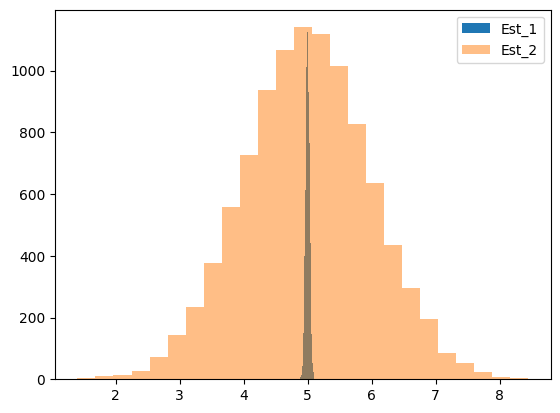

In [76]:
# Estimator Values Histogram
plt.hist(A1,bins=25, label='Est_1', alpha=1)
plt.hist(A2,bins=25, label='Est_2', alpha=0.5)
plt.legend()
plt.show()

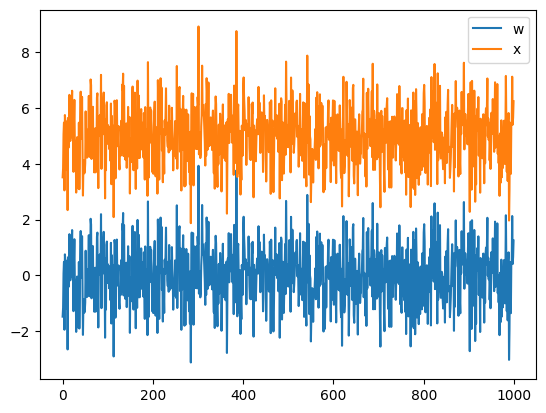

In [77]:
# Estimators Value Plot
plt.plot(w,label='w')
plt.plot(x,label='x')
plt.legend()
plt.show()

In [78]:
# Standard Statistical Estimators
mw = np.mean(w)
mx = np.mean(x)

vw = np.var(w)
vx = np.var(x)

print(f"Noise Mean: {mw}, Signal Mean: {mx}")
print(f"Noise Variance: {vw}, Signal Variance: {vx}")

Noise Mean: 0.008118141834609027, Signal Mean: 5.0081181418346095
Noise Variance: 1.0739498386910085, Signal Variance: 1.0739498386910085


In [79]:
# Standard Statistical Estimators for each Selected Estimator
m1 = np.mean(A1)
m2 = np.mean(A2)

v1 = np.var(A1)
v2 = np.var(A2)
print(f"Est1 Mean: {m1}, Est2 Mean: {m2}")
print(f"Est1 Variance: {v1}, Est2 Variance: {v2}")

Est1 Mean: 5.000118518870145, Est2 Mean: 4.991299322907456
Est1 Variance: 0.0010007173524319711, Est2 Variance: 0.9616909746083775


**NOTA**

Este último resultado muestra cómo efectivamente el comportamiento de ambos estimadores $(\hat A_1, \hat A_2)$ ha sido bien determinado de acuerdo a la teoría. Donde:

$$\
\boxed{\\hat A_1 \sim \mathcal{N}\\left(A,\frac{1}{N}\right)\}
\$$

$$\
\boxed{\\hat A_2 \sim \mathcal{N}\\left(A,{1}\right)\}
\$$


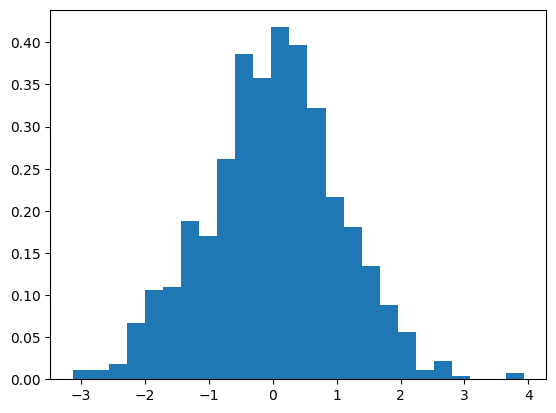

In [80]:
# Noise Gaussian Density Distribution
plt.hist(w, bins=25, density=True)
plt.show()

##**Tarea 2**
- Genere datos sintéticos a partir de un tono sinusoidal, contaminado con ruido blanco Gaussiano para $SNR_{dB}=\{1,2,5,10\} [dB].$

 - Entrene y pruebe los modelos de regresión por mínimos cuadrados (regularizado con norma L2) y log-verosimilitud, utilizando el $80\%$ de los datos para entrenar y el $20\%$ para evaluar.

### **Relación Señal-Ruido ó Signal to Noise Ratio (SNR)**

Sean las potencias para la señal y el ruido aplicado:

$$P_x = \frac{1}{T}\int |x(t)|^2 dt$$

$$P_\eta = \frac{1}{T}\int |\eta(t)|^2 dt$$

donde $P_x:$ Potencia de la Señal y $P_\eta:$ Potencia de la Señal


La SNR se define como:

$$SNR = \frac{P_x}{P_\eta}$$

En decibeles:

$$SNR_{dB}  = 10\log_{10}\left(\frac{P_x}{P_\eta}\right) \quad [dB]$$

Para pasar de $SNR_{dB}$ a SNR:

$$SNR = 10^{\frac{SNR_{dB}}{10}} =  \frac{P_x}{P_\eta}$$


Para el caso de ruido blanco Gaussiano:

$$\eta \sim p(\eta) = \mathscr{G}(\eta|0,\sigma_\eta^2)$$

Dado que $\mu_\eta = 0$:

$$\sigma_\eta^2 = \mathbb{E}\{(\eta-\mu_\eta)^2\} = \mathbb{E}\{\eta^2\} $$

Utilizando estimador de media muestral:

$$\sigma_{\eta}^{2}=\frac{1}{N}\sum_\limits{\eta} \eta^2$$

Entonces:

$$\sigma_{\eta}^{2} = P_\eta = \frac{P_x}{SNR} =  \frac{P_x}{ 10^{\frac{SNR_{dB}}{10}}}$$


In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Variance Calculation Function from SNR dB
def varSNR(x, snrdB):
  '''
  x: Signal Vector
  snrdB: Signal to Noise Ratio in dB
  '''

  # Mean Power Estimator from Signal
  Px = np.mean(x**2)
  return Px/(10**(snrdB/10))

Se construyen los datos a partir del modelo:

$$t_n = A\sin(2\pi F_o x_n) + \eta_n$$

con:

$x_n \in [0,T_o]$

$T_o=1/F_o$

$\eta \sim \mathscr{G}(\eta_n|0,\sigma^2_\eta)$

In [82]:
# Simulated Data
Fo = 60           # Fundamental Frecuency
A = 10            # Signal Amplitude
To = 1/Fo         # Fundamental Period
Fs = 100*Fo       # Sampling Frecuency according to Nyquist Criteria
X = np.arange(0, To, 1/Fs) # Input Vector over 3 Periods with 1/T Steps

snrdB = np.array([1,2,5,10]) # Noise Power Vector
tt = A*np.sin(2*np.pi*Fo*X)  # Clean Objective Signal

# Signal Contaminated with Gaussian White Noise
#t = tt + np.sqrt(varSNR(tt, snrdB[-1])) * np.random.randn(len(X))
tArr = np.array([(tt + np.sqrt(varSNR(tt, snrdB[i])) * np.random.randn(len(X)))
                  for i in range(len(snrdB))])

X = X.reshape(-1,1)
for t in tArr:
  t = t.reshape(-1,1)

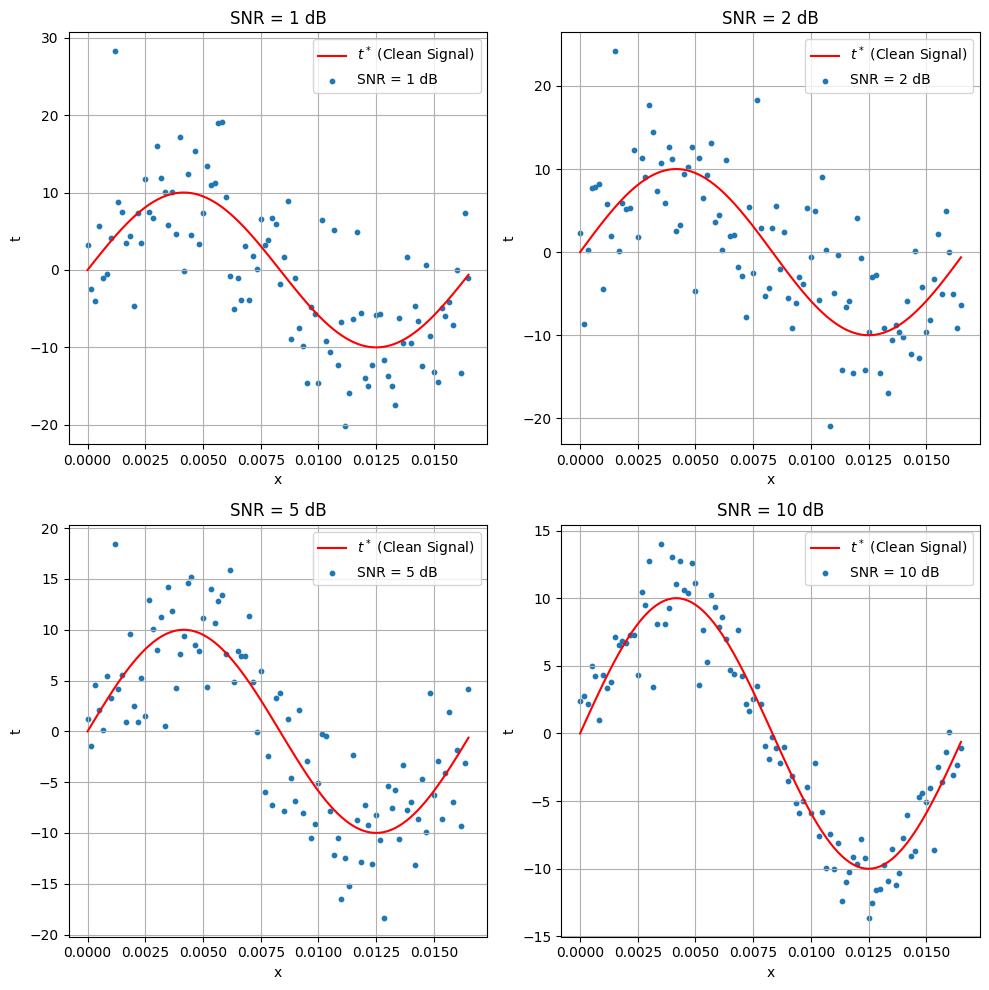

In [83]:
# Signals Visualization with Different Powers
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, t in enumerate(tArr):
    axes[i].plot(X, tt, c='r', label='$t^*$ (Clean Signal)')
    axes[i].scatter(X, t, label=f'SNR = {snrdB[i]} dB', s=10)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('t')
    axes[i].set_title(f'SNR = {snrdB[i]} dB')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## Solución por mínimos cuadrados:

Se asume mapeo $\phi:\mathbb{R}^P\to\mathbb{R}^Q$, con $Q\geq P.$

Dado el conjunto de datos $\{\phi(\mathbf{x}_n) \in \mathbb{R}^Q, t_n \in \mathbb{R}\}_{n=1}^N,$ podemos definir el modelo lineal:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\mathbf{w}\in\mathbb{R}^Q$

## Estimador por mínimos cuadrados:

El estimador generalizado de mínimos cuadrados con regularización L2 (Ridge Linear Regression), se puede plantear como:

$$\mathbf{w}_{MC2} = \arg\min_{\mathbf{w}} \|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2 + \lambda \|\mathbf{w}\|^2_2$$

con:

$\mathbf{t} = [t_1,t_2,\cdots,t_n]^\top\in\mathbb{R}^N$

$\pmb{\Phi}=[\phi(\mathbf{x}_1),\phi(\mathbf{x}_2),\cdots,\phi(\mathbf{x}_N)]^\top\in\mathbb{R}^{N\times Q}$

$\lambda\in\mathbb{R}^{+}$

Derivando e igualando a cero para encotrar el mínimo de la función de costo, tenemos que:

$$\mathbf{w}_{mc} = \left(\pmb{\Phi}^\top \pmb{\Phi}+\lambda\mathbf{I_Q}\right)^{-1}\pmb{\Phi}^\top \mathbf{t}$$

$\mathbf{I}_Q$: matriz identidad de tamaño $Q$.





**Error Cuadrático Medio (MSE) y Error por Validación Cruzada**

En tareas de regresión, medimos la calidad de las predicciones por medio del **Error Cuadrático Medio (MSE)**:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N \big( y_i - \hat{y}_i \big)^2
$$

donde $y_i$ es el valor verdadero, $\hat{y}_i$ la predicción del modelo, and $N$ el número de muestras de prueba.  

Un MSe pequeño indica una mejor capacidad predictiva (Mayor Precisión).

---

Para asegurarnos de que nuestro modelo generaliza bien y no solo ajusta nuestros datos de entrenamiento, usamos **Validación Cruzada (CV)**.  
En la **Validación Cruzada por K-capas**, el conjunto de datos se divide en $K$ partes (capas). Por cada capa:

1. Entrenamos en $K-1$ capas.  
2. Probamos en la capa restante.  
3. Computamos el MSE para dicha capa.

Finalmente, el **Error por Validación Cruzada (CV Error)** se obtiene promediando a través de las capas:

$$
\text{CV Error} = \frac{1}{K} \sum_{k=1}^{K} \text{MSE}_k
$$

---

En el contexto de la tarea de regresión de una **Señal Sinusoidal Contaminada por Ruido Gaussiano Blanco**, el error CV provee un estimado robusto de la función subyacente mientras restringe hasta cierto el efecto del ruido circundante.


In [84]:
# Library Import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [85]:
trainedModels = []     # Model Storage
predictions = []        # Predictions of Models Stored
MSE = []                # MSE of Models Stored
CVErrors = []          # Cross-Validation MSE Error of Models Stored

# Regression Coefficients of Models Stored
coefficientsFull = []
coefficientsKFold = []

# X Transformed Storage Arrays
PhiArr = []
XTrainArr = []
XTestArr = []
yTrainArr = []
yTestArr = []
degrees = [i for i in range(1, 16)]

for i in degrees:
  phiQ = PolynomialFeatures(degree=i)
  Phi = phiQ.fit_transform(X)
  PhiArr.append(Phi)

  # Full Training Set Fitting and Predictions
  XTrainFull, XTestFull, yTrainFull, yTestFull = train_test_split(Phi, tArr[0], test_size=0.2, random_state=0)
  XTrainArr.append(XTrainFull)
  XTestArr.append(XTestFull)
  yTrainArr.append(yTrainFull)
  yTestArr.append(yTestFull)

  regFull = Ridge(alpha=5e-16)
  regFull.fit(XTrainFull, yTrainFull)
  yPredFull = regFull.predict(XTestFull)
  trainedModels.append(regFull)
  predictions.append(yPredFull)
  MSE.append(mean_squared_error(yTestFull, yPredFull))
  coefficientsFull.append(regFull.coef_)

  # Cross-validation Setup
  kf = KFold(n_splits=5, shuffle=True, random_state=0)
  foldMSE = [] # List to store MSE for each fold
  coefficientsFold = [] # List to Store Coefficients Vector of the Regression

  for trainIndex, testIndex in kf.split(Phi):
    XTrain, XTest = Phi[trainIndex], Phi[testIndex]
    yTrain, yTest = tArr[-1][trainIndex], tArr[-1][testIndex]

    reg = Ridge(alpha=5e-16)
    reg.fit(XTrain, yTrain)
    yPred = reg.predict(XTest)
    foldMSE.append(mean_squared_error(yTest, yPred))
    coefficientsFold.append(reg.coef_)

  # Calculate average MSE for the current degree (Cross-Validation Error)
  coefficientsKFold.append(np.mean(coefficientsFold, axis=0))
  CVErrors.append(np.mean(foldMSE))

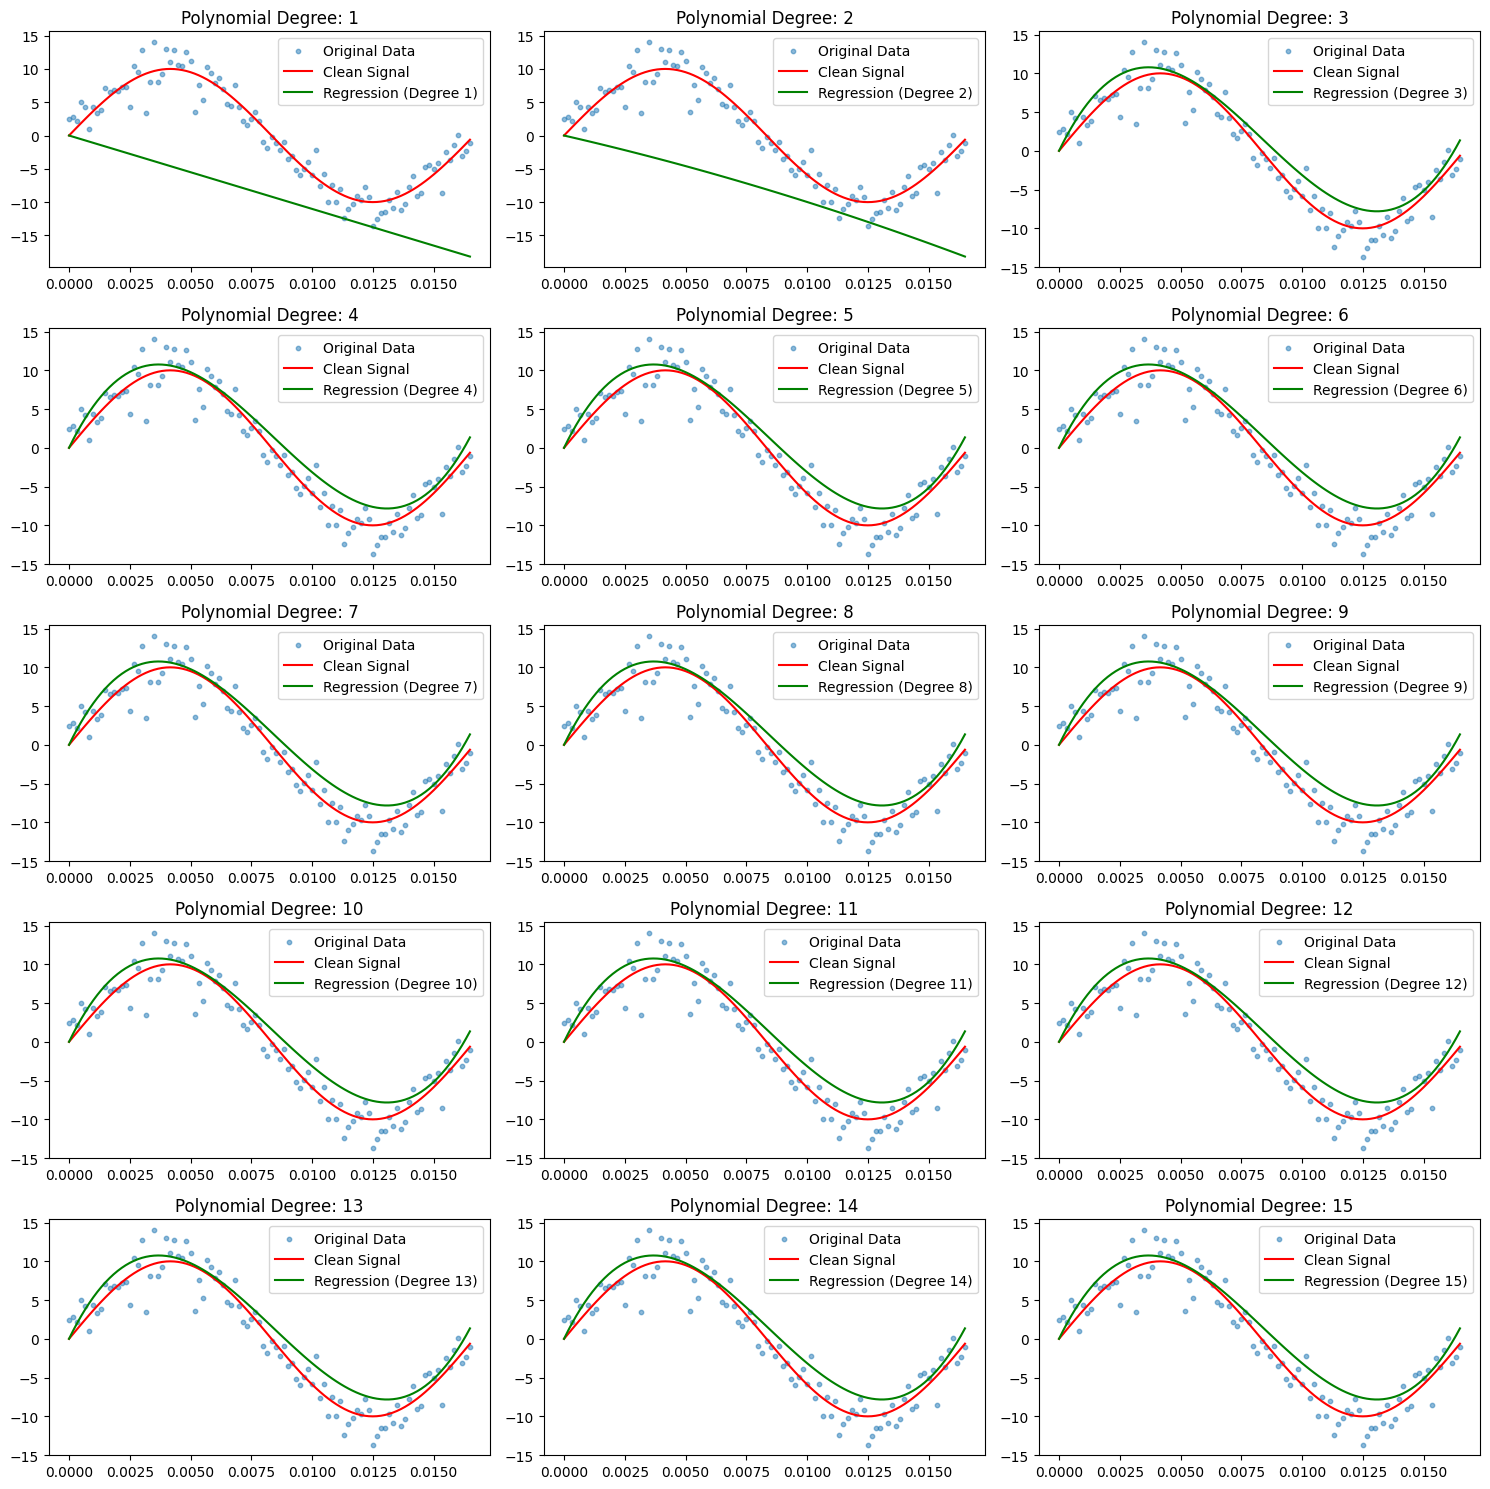

In [86]:
# Regressions Visualizations - Without CrossValidation
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
  ax = axes[i]

  # Calculate the regression line using the stored coefficients and the original X range
  y = PhiArr[i] @ coefficientsFull[i].T

  # Plotting the regression line and the ML variance area
  ax.scatter(X.flatten(), tArr[-1].flatten(), label='Original Data', s=10, alpha=0.5)
  ax.plot(X.flatten(), tt.flatten(), c='r', label='Clean Signal')

  # Plot the regression line using the original X values
  ax.plot(X.flatten(), y.flatten(), c='g', label=f'Regression (Degree {degree})')
  ax.set_title(f'Polynomial Degree: {degree}')
  ax.legend()

plt.tight_layout()
plt.show()

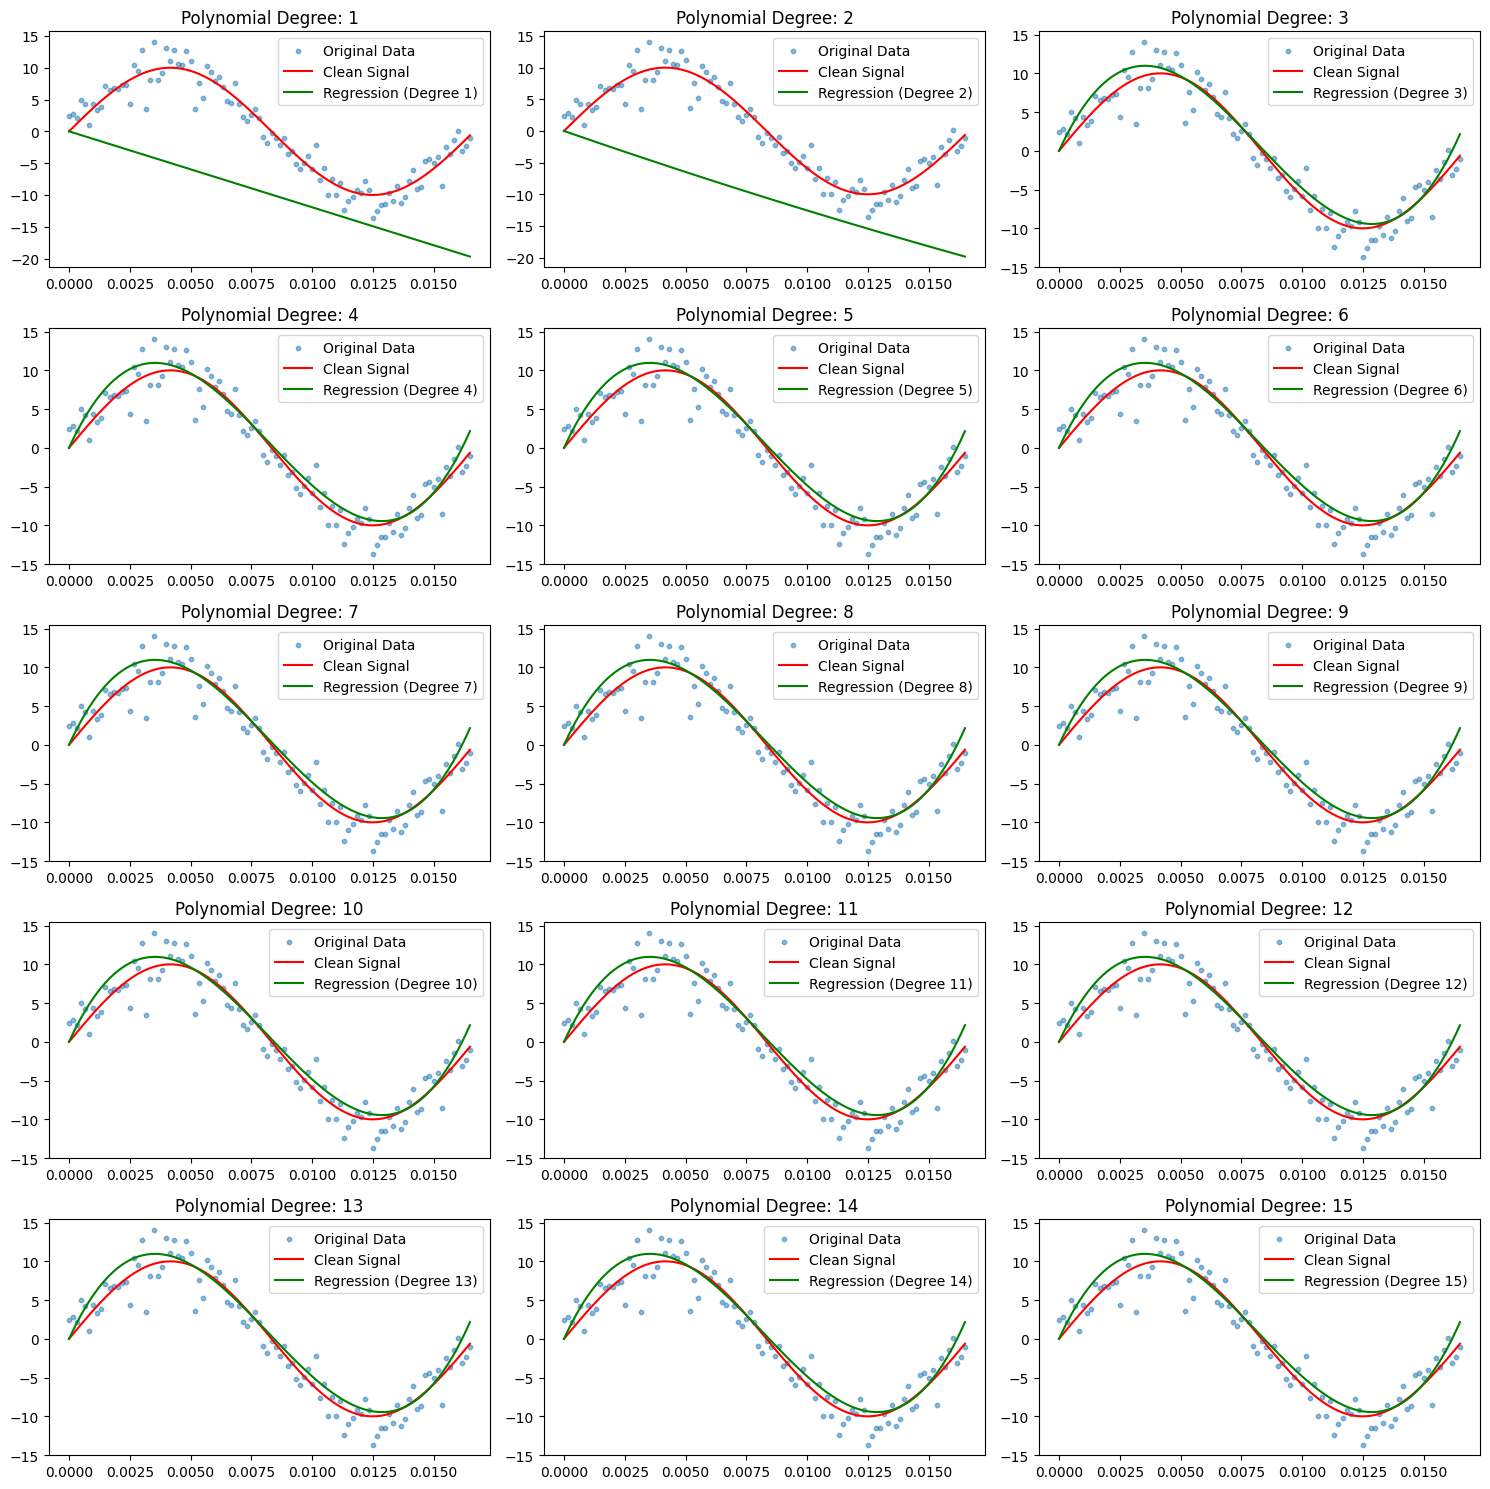

In [87]:
# Regressions Visualizations - CrossValidation Coefficients
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
  ax = axes[i]

  # Calculate the regression line using the stored coefficients and the original X range
  y = PhiArr[i] @ coefficientsKFold[i].T

  # Plotting the regression line and the ML variance area
  ax.scatter(X.flatten(), tArr[-1].flatten(), label='Original Data', s=10, alpha=0.5)
  ax.plot(X.flatten(), tt.flatten(), c='r', label='Clean Signal')

  # Plot the regression line using the original X values
  ax.plot(X.flatten(), y.flatten(), c='g', label=f'Regression (Degree {degree})')
  ax.set_title(f'Polynomial Degree: {degree}')
  ax.legend()

plt.tight_layout()
plt.show()

**NOTA:**

Visualmente es apreciable como los coeficientes de regresión resultantes de la Regresión por Validación Cruzada dan mejores resultados.

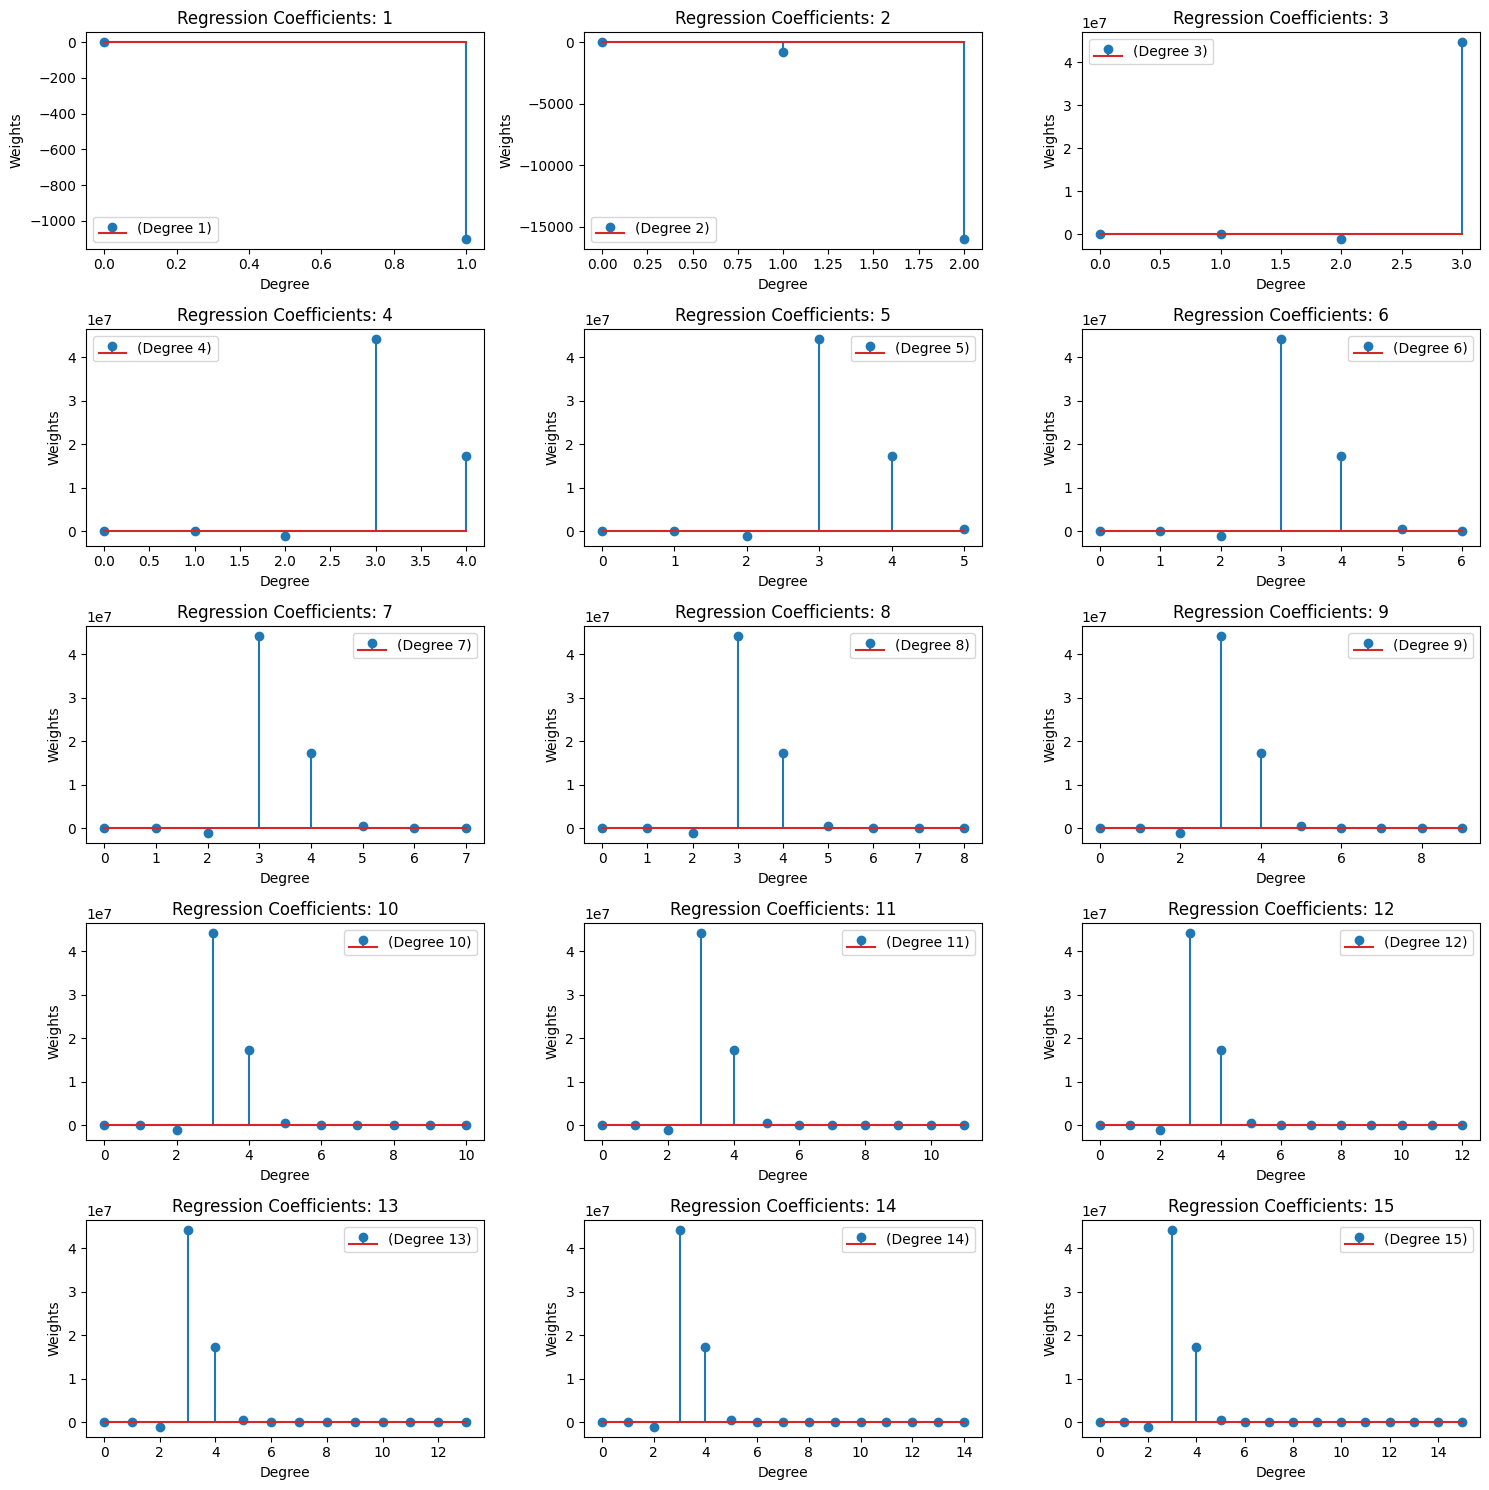

In [88]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
  ax = axes[i]

  # Plot Regression Coefficients Values of ith Degree - No CrossValidation
  ax.stem(coefficientsFull[i], label=f'(Degree {degree})')
  ax.set_title(f'Regression Coefficients: {degree}')
  ax.set_ylabel('Weights')
  ax.set_xlabel('Degree')
  ax.legend()

plt.tight_layout()
plt.show()

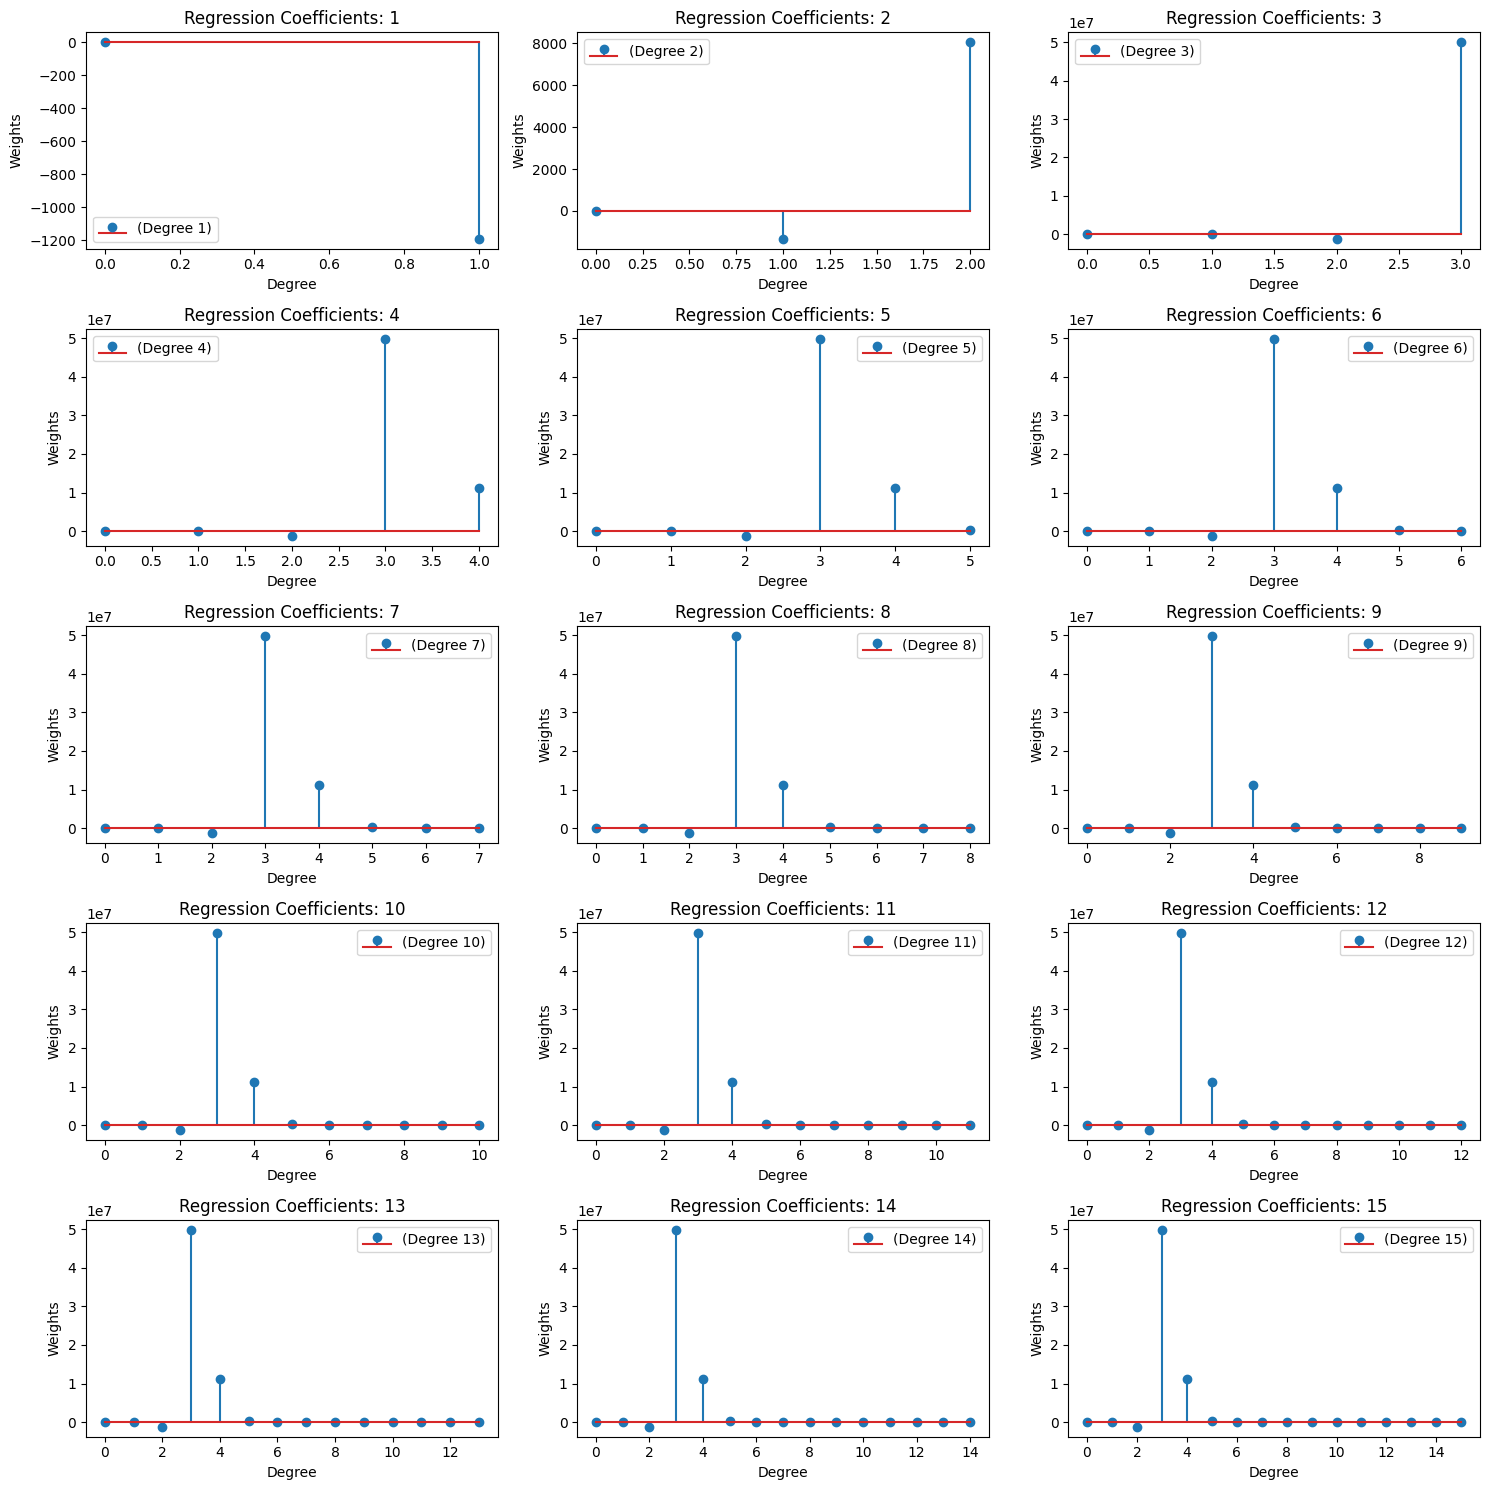

In [89]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
  ax = axes[i]

  # Plot Regression Coefficients Values of ith Degree - CrossValidation
  ax.stem(coefficientsKFold[i], label=f'(Degree {degree})')
  ax.set_title(f'Regression Coefficients: {degree}')
  ax.set_ylabel('Weights')
  ax.set_xlabel('Degree')
  ax.legend()

plt.tight_layout()
plt.show()

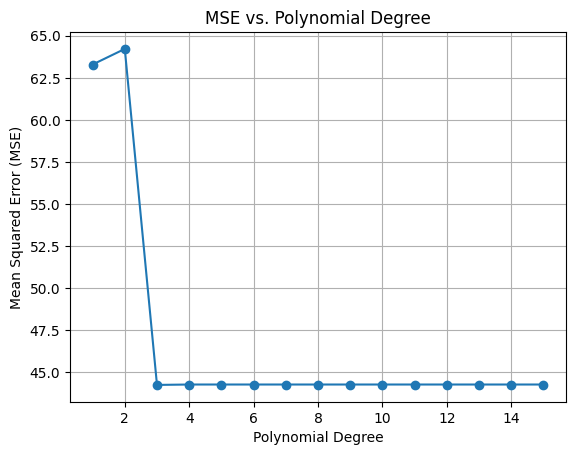

In [90]:
plt.plot(degrees, MSE, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Polynomial Degree')
plt.grid(True)
plt.show()

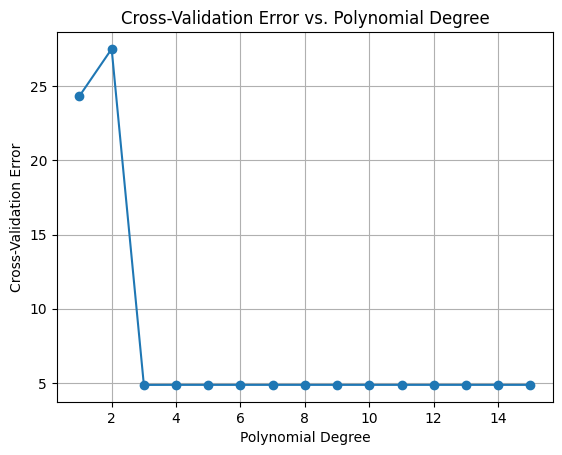

In [91]:
plt.plot(degrees, CVErrors, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation Error')
plt.title('Cross-Validation Error vs. Polynomial Degree')
plt.grid(True)
plt.show()

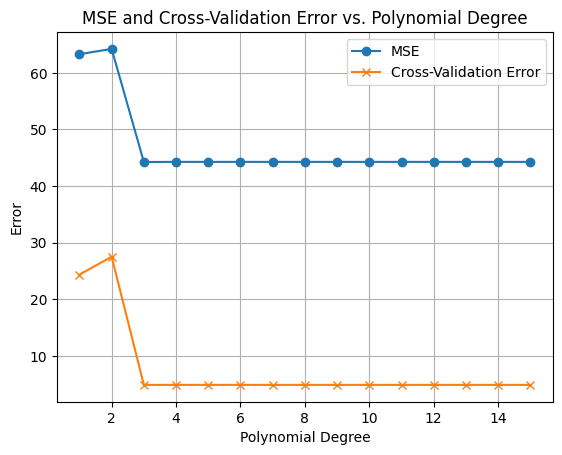

In [92]:
plt.plot(degrees, MSE, marker='o', label='MSE')
plt.plot(degrees, CVErrors, marker='x', label='Cross-Validation Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('MSE and Cross-Validation Error vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

**NOTA**

El mejor polinomio de ajuste es el de Tercer Grado, dado que este es el Polinomio de menor complejidad que mejor minimiza el error cuadrático medio.

# Predictiva desde máxima verosimilitud

Para el caso de ruido blanco Gaussiano, tenemos que:

$\eta_n \sim p(\eta_n) = \mathscr{G}(\eta_n|0,\sigma_\eta^2)$

con:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\eta_n = t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top$

Por lo tanto:

$p(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2) = \mathscr{G}(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2)$

Podemos encontrar los pesos y la varianza maximizando el log-verosimilitud:

$$\mathbf{w}_{ML} = \arg\max_{\mathbf{w},\sigma_\eta^2} \log\left(\prod_{n=1}^N\mathscr{G}(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2)\right)$$

Asumiendo datos i.i.d.:

$$\mathbf{w}_{ML},\sigma_{ML}^2 = \arg\max_{\mathbf{w},\sigma_\eta^2} -\frac{N}{2}\log(2\pi)-\frac{N}{2}\log(\sigma_\eta^2)-\frac{1}{2\sigma^2}\|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2$$

Derivando respecto a las variables de interés, e igualando a 0:

$$\sigma^2_{ML} = \frac{1}{N}\sum_\limits{n=1}^N\left(t_n-\phi(\mathbf{x}_n)\mathbf{w}^\top\right)^2$$

$$\mathbf{w}_{ML} = \left(\pmb{\Phi}^\top \pmb{\Phi}\right)^{-1}\pmb{\Phi}^\top \mathbf{t}$$


La fdp predictiva, para un nuevo dato $\mathbf{x}_*$, se puede estimar como:

$$p(t_*|\mathbf{x}_*,\mathbf{t},\pmb{\Phi},\mathbf{w}_{ML},\sigma^2_{ML})=\mathscr{G}(t_*|\phi(\mathbf{x}_*)\mathbf{w}_{ML}^\top,\sigma_{ML}^2)$$

Es posible observar que la Regresión por Máxima Verosimilitud degenera en una solución de Mínimos Cuadrados para variables de tipo i.i.d.

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3017825294.py:31: SyntaxWarning: invalid escape sequence '\s'
  color='g', alpha=0.2, label='ML Variance ($1.96\sigma_{ML}$)')


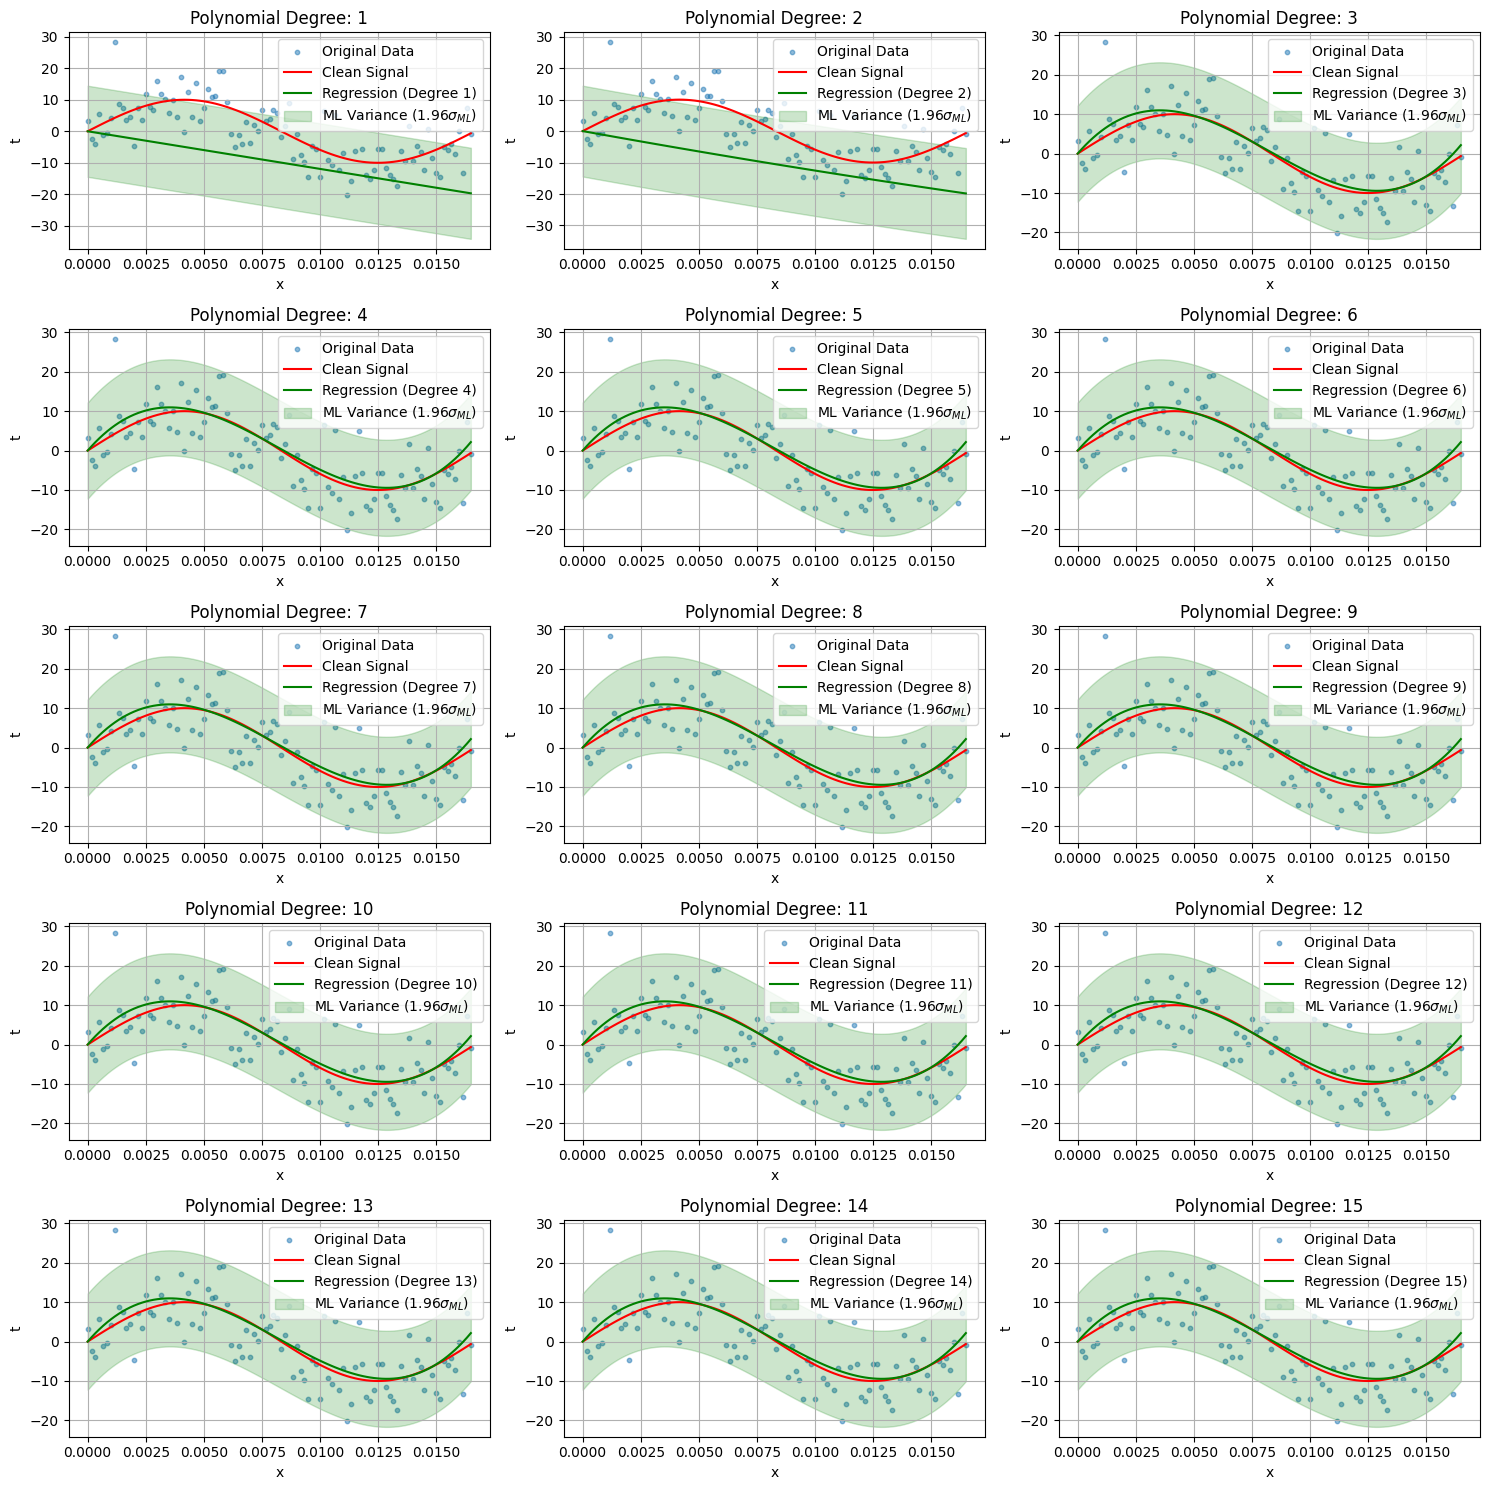

In [93]:
"""
This code snippet presents the Solutions to the solution problem,
adding a variance term to the least squares regression, which represents
the maximum likelihood solution.

In the graph, this variance will be represented as the shaded green area and
will present a 95% confidence interval given by 1.96*(VarML)
"""
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
  ax = axes[i]

  # Calculate the regression line using the stored coefficients and the original X range
  y = PhiArr[i] @ coefficientsKFold[i].T

  # Calculate ML variance using the provided formula on the training data
  varML = (np.linalg.norm(yTrainArr[i] - trainedModels[i].predict(XTrainArr[i]))**2) / len(yTrainArr[i])

  # Plotting the regression line and the ML variance area
  ax.scatter(X.flatten(), tArr[0].flatten(), label='Original Data', s=10, alpha=0.5)
  ax.plot(X.flatten(), tt.flatten(), c='r', label='Clean Signal')

  # Plot the regression line using the original X values
  ax.plot(X.flatten(), y.flatten(), c='g', label=f'Regression (Degree {degree})')

  ax.fill_between(X.flatten(),
                  y.flatten() - 1.96*np.sqrt(varML),
                  y.flatten() + 1.96*np.sqrt(varML),
                  color='g', alpha=0.2, label='ML Variance ($1.96\sigma_{ML}$)')


  ax.set_title(f'Polynomial Degree: {degree}')
  ax.set_xlabel('x')
  ax.set_ylabel('t')
  ax.legend()
  ax.grid(True)

plt.tight_layout()
plt.show()